<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Given values
frequency = 2
nominal = 1000000
fixed_rate = 0.05

In [3]:
df = pd.read_excel('/Users/yuliyahilevich/Desktop/Finance/Tresuary.xlsx')
df.head(20)

,Tenor,Rate
0,6 Mo,0.16
1,1 Yr,0.27
2,2 Yr,0.65
3,3 Yr,0.91
4,5 Yr,1.17
5,7 Yr,1.34
6,10 Yr,1.43
7,20 Yr,1.90
8,30 Yr,1.85


<AxesSubplot:>

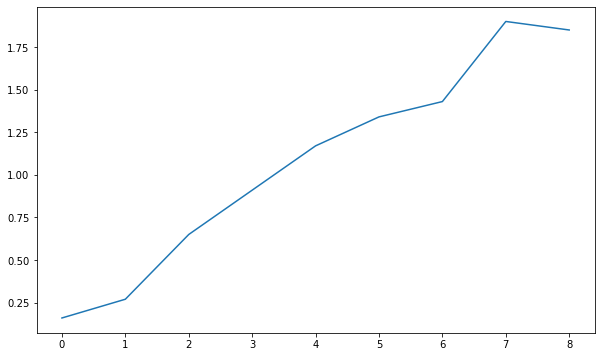

In [4]:
df.iloc[:, -1].plot(figsize=(10, 6))

In [5]:
df['Tenor'] = df['Tenor'].str.replace('Yr', '')
df['Tenor'] = df['Tenor'].str.replace('6 Mo', '0.5')
df = pd.DataFrame(df)
df

,Tenor,Rate
0,0.5,0.16
1,1,0.27
2,2,0.65
3,3,0.91
4,5,1.17
5,7,1.34
6,10,1.43
7,20,1.90
8,30,1.85


In [6]:
Tenor = np.arange(0.5, 30.5, 0.5).tolist()
tenor = [0.5,1,2,3,5,7,10,20,30]
rates = [0.16,0.27,0.65,0.91,1.17,1.34,1.43,1.9,1.85]

r_linear = np.interp(Tenor, tenor, rates)
r_linear

array([0.16  , 0.27  , 0.46  , 0.65  , 0.78  , 0.91  , 0.975 , 1.04  ,
       1.105 , 1.17  , 1.2125, 1.255 , 1.2975, 1.34  , 1.355 , 1.37  ,
       1.385 , 1.4   , 1.415 , 1.43  , 1.4535, 1.477 , 1.5005, 1.524 ,
       1.5475, 1.571 , 1.5945, 1.618 , 1.6415, 1.665 , 1.6885, 1.712 ,
       1.7355, 1.759 , 1.7825, 1.806 , 1.8295, 1.853 , 1.8765, 1.9   ,
       1.8975, 1.895 , 1.8925, 1.89  , 1.8875, 1.885 , 1.8825, 1.88  ,
       1.8775, 1.875 , 1.8725, 1.87  , 1.8675, 1.865 , 1.8625, 1.86  ,
       1.8575, 1.855 , 1.8525, 1.85  ])

In [7]:
df = pd.DataFrame({'Tenor':Tenor, 'Rate':r_linear})

In [8]:
#Creating DF with n. of periods 'future cashflows'
df.insert(0, 'Period', range(1, 1 + len(df)))
df.head(5)

,Period,Tenor,Rate
0,1,0.5,0.16
1,2,1.0,0.27
2,3,1.5,0.46
3,4,2.0,0.65
4,5,2.5,0.78


In [9]:
#Turning our rates in %
df['Rate']=[rate/100 for rate in df['Rate']]

In [10]:
# Lets calculate discount factor 
df['Discount factor'] = 1 / (1 + df['Rate']/2)**df['Period']
df.head(5)

,Period,Tenor,Rate,Discount factor
0,1,0.5,0.0016,0.999201
1,2,1.0,0.0027,0.997305
2,3,1.5,0.0046,0.993132
3,4,2.0,0.0065,0.987105
4,5,2.5,0.0078,0.980726


In [11]:
#Calculating future cashflows on fixed leg
df['Fixed CF_FV'] = nominal*fixed_rate/frequency
df.head(5)

,Period,Tenor,Rate,Discount factor,Fixed CF_FV
0,1,0.5,0.0016,0.999201,25000.0
1,2,1.0,0.0027,0.997305,25000.0
2,3,1.5,0.0046,0.993132,25000.0
3,4,2.0,0.0065,0.987105,25000.0
4,5,2.5,0.0078,0.980726,25000.0


In [12]:
#As an option
'''def cash_flows(Period):
    cf = []
    for i in Period:
        cf.append(nominal*fixed_rate/frequency)
    return cf

df['DF'] = cash_flows(df['Period'])
df.head()'''

"def cash_flows(Period):\n    cf = []\n    for i in Period:\n        cf.append(nominal*fixed_rate/frequency)\n    return cf\n\ndf['DF'] = cash_flows(df['Period'])\ndf.head()"

In [13]:
#Applyin discounf factor to founf out the present value of the future cashflows
df['Fixed CF_PV'] = df['Fixed CF_FV']*df['Discount factor']

In [14]:
# Lets shift Discount factor for simplicity of calculation of forward rate
df["Rate_Shift"] = df["Rate"].shift(1, fill_value=0)
df['Forward Rate'] = (((1 + df["Rate"]) ** df["Period"]) / 
                       ((1 + df["Rate_Shift"]) ** (df["Period"] - 1))-1)

df.head(5)

,Period,Tenor,Rate,Discount factor,Fixed CF_FV,Fixed CF_PV,Rate_Shift,Forward Rate
0,1,0.5,0.0016,0.999201,25000.0,24980.015987,0.0000,0.001600
1,2,1.0,0.0027,0.997305,25000.0,24932.636442,0.0016,0.003801
2,3,1.5,0.0046,0.993132,25000.0,24828.290469,0.0027,0.008411
3,4,2.0,0.0065,0.987105,25000.0,24677.623558,0.0046,0.012222
4,5,2.5,0.0078,0.980726,25000.0,24518.152248,0.0065,0.013017


In [15]:
#The typic formula for Forward rate but i came across some of the issue with final value
'''df['DF_Shift'] = df['Discount factor'].shift(1, fill_value=0)
df["FR"] = (df['DF_Shift']/ df['Discount factor'] - 1)*2
df.head(5)'''

'df[\'DF_Shift\'] = df[\'Discount factor\'].shift(1, fill_value=0)\ndf["FR"] = (df[\'DF_Shift\']/ df[\'Discount factor\'] - 1)*2\ndf.head(5)'

In [19]:
#Calculating the valued of the future cash flows on the flowting leg and applyiing gisocutn factor straight away
df['Floating CF_PV'] = (df['Forward Rate']*nominal/frequency)*df['Discount factor']
df.tail(5)

,Period,Tenor,Rate,Discount factor,Fixed CF_FV,Fixed CF_PV,Rate_Shift,Forward Rate,Floating CF_PV
55,56,28.0,0.018600,0.595477,25000.0,14886.914925,0.018625,0.017226,5128.823401
56,57,28.5,0.018575,0.590406,25000.0,14760.158418,0.018600,0.017176,5070.403375
57,58,29.0,0.018550,0.585394,25000.0,14634.843824,0.018575,0.017126,5012.730752
58,59,29.5,0.018525,0.580438,25000.0,14510.952722,0.018550,0.017076,4955.794913
59,60,30.0,0.018500,0.575539,25000.0,14388.466955,0.018525,0.017026,4899.585405


In [20]:
#The Value of Vanilla plain swap
PV = sum(df['Fixed CF_PV'])-sum(df['Floating CF_PV'])
print(PV)

744097.8238802409
